# mBuild Tutorial 00: Getting Started

This tutorial is designed to introduce you to the primary mission of mBuild - to facilitate the creation of complex molecular systems in a flexible fashion that allows system chemistry to be easily modulated. You will learn about the hierarchical data structure of mBuild `Compounds` and will have the ability to play around with some pre-built mBuild classes to observe how system structure can be changed by providing a few simple top-level variables.

### Hierarchical design approach

mBuild uses a [composite design pattern](https://en.wikipedia.org/wiki/Composite_pattern) to approach the creation of complex molecular systems. This yields the following features:
* Molecules feature a tree-like hierarchy (as shown in the figure below)
* All components in the hierarchy feature a common data structure (an mBuild `Compound`)
* The lowest level of the hierarchy (the 'leaves') are referred to as `Particles` and are typically individual atoms
* Atomic positions are maintained only at the `Particle` level; higher level components can compute properties based on contained `Particles`

Below is an example of an mBuild molecule hierarchy for an alkylsilane monolayer attached to a crystalline silica surface.
<img src="hierarchical_design_image.png" alt="Drawing" style="width: 700px;"/>

### Primer on using Jupyter notebooks

[Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/) provide an interactive environment for "developing, documenting, and executing code". Several languages are supported; however here we will be using Python. 

Jupyter notebooks feature two primary types of cells:
1. Markdown cells, like this cell, which contain explanatory text
2. Code cells, that can be executed by either clicking on the "run cell" icon or by hitting SHIFT + ENTER.

Cells do not have to be executed in order (however the cells in this tutorial are designed to be executed sequentially), and the order in which cells have been executed is recorded by the bracketed number to the left of the code cell (e.g. [ 1 ]). When a cell is executed you will first see an asterisk (i.e. [ * ]) which means that the cell is still running. When the asterisk is replaced by a number this means the execution has completed.

### Importing mBuild

To begin using mBuild we need to import the mBuild package, which is available through both the [Anaconda](https://anaconda.org/mosdef/mbuild) and [pip](https://pypi.python.org/pypi/mbuild/0.7.2) package managers. mBuild can also be downloaded from source, which is hosted on [Github](https://github.com/mosdef-hub/mbuild).

Here, we'll import the mBuild package along with a `visualize` routine that will allow us to view our molecules along the way. The `%matplotlib notebook` routine is a Jupyter 'magic' command that allows us to interactively view matplotlib figures within a notebook.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

## Examples

Here, we'll explore some examples of mBuild `Compound` classes that have been pre-defined. Each features several top-level variables that can be manipulated to tune the system of interest.

### Alkanes

The `Alkane` example class allows one to tune the chain length via the `n` argument.

In [2]:
from mbuild.examples import Alkane

help(Alkane)

Help on class Alkane in module mbuild.examples.alkane.alkane:

class Alkane(mbuild.compound.Compound)
 |  An alkane which may optionally end with a hydrogen or a Port.
 |  
 |  Method resolution order:
 |      Alkane
 |      mbuild.compound.Compound
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, n=3, cap_front=True, cap_end=True)
 |      Initialize an Alkane Compound.
 |      
 |      Args:
 |          n: Number of carbon atoms.
 |          cap_front: Add methyl group to beginning of chain ('down' port).
 |          cap_end: Add methyl group to end of chain ('up' port).
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from mbuild.compound.Compound:
 |  
 |  __getitem__(self, selection)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add(self, new_child, label=None, containment=True, replace=False, inherit_periodicity=True, reset_rigid_ids=True)
 |      Add a part to the Compound.
 |      
 

<IPython.core.display.Javascript object>


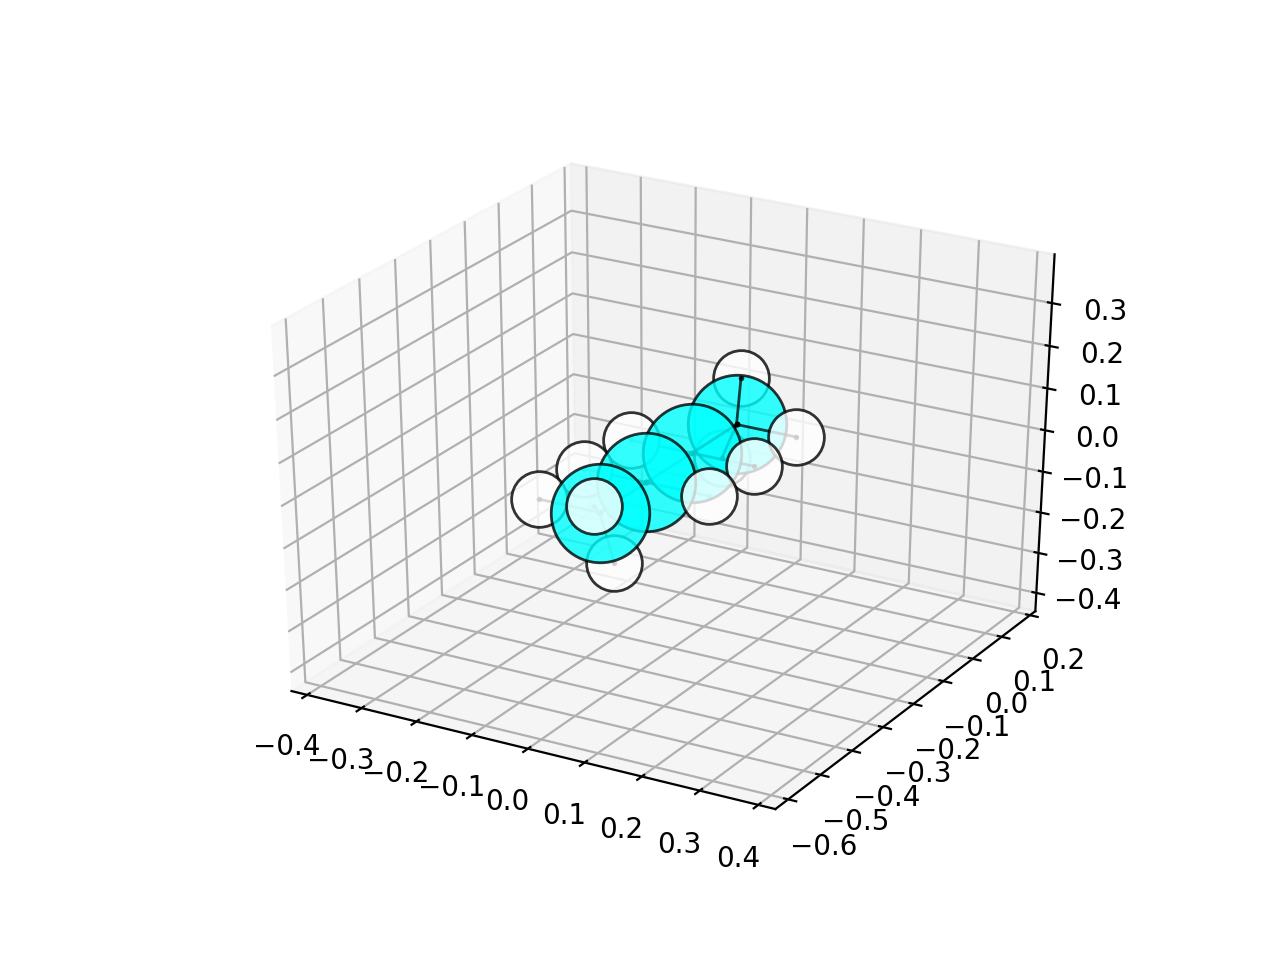

In [6]:
butane = Alkane(4)
visualize(butane, show_ports=False)

<IPython.core.display.Javascript object>


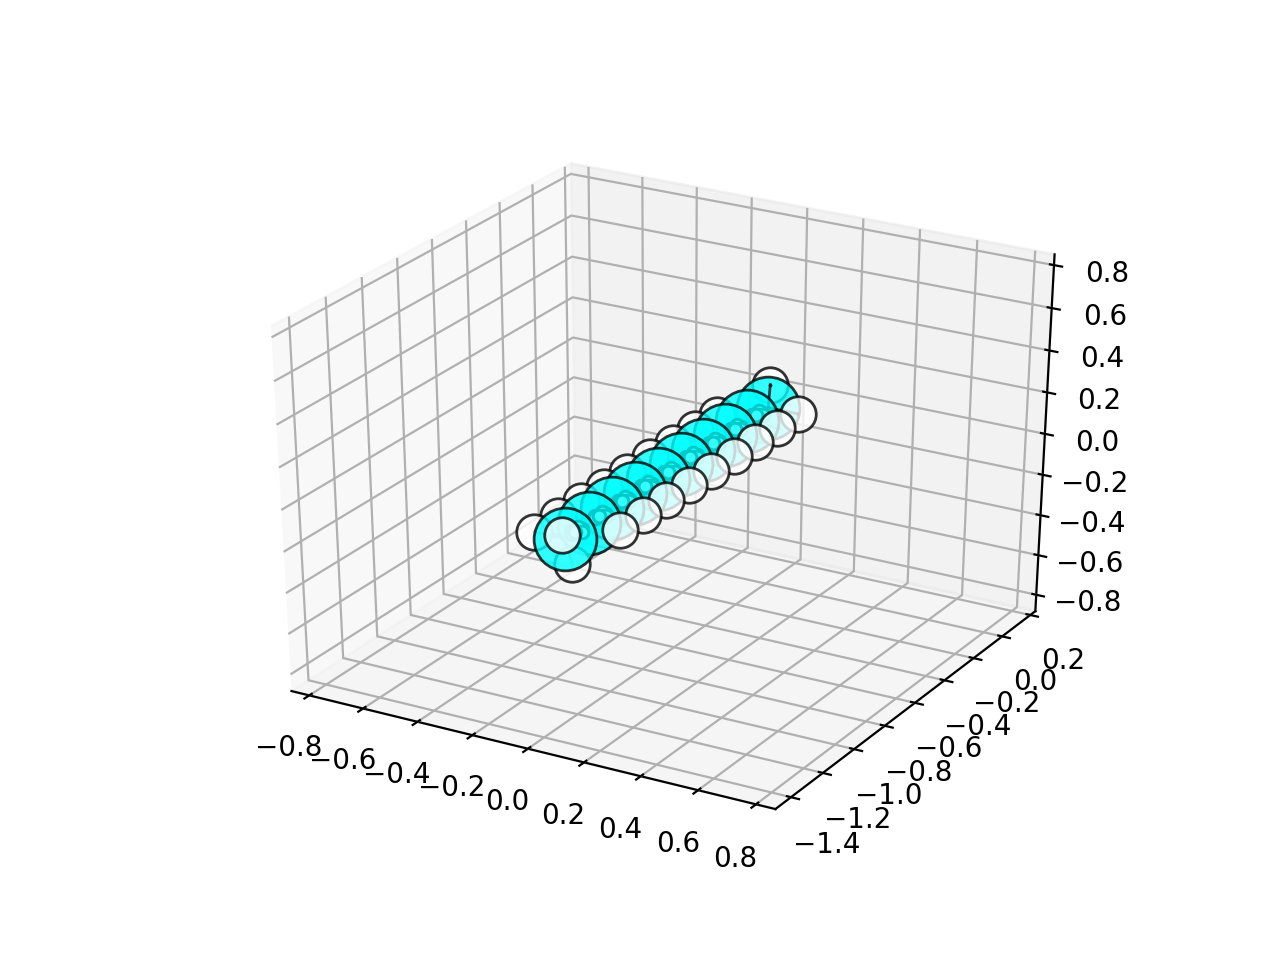

In [7]:
decane = Alkane(10)
visualize(decane)

### Alkylsilane monolayers

The `AlkaneMonolayer` class constructs an alkylsilane monolayer on crystalline silica.  The `pattern` argument can be used to tune where chains are placed on the surface. The `tile_x` and `tile_y` arguments can be used to replicate the surface in the $x$ and $y$ dimensions. And the `chain_length` argument can be used to tune the length of the alkylsilane chains.

In [8]:
from mbuild.examples import AlkaneMonolayer

help(AlkaneMonolayer)

Help on class AlkaneMonolayer in module mbuild.examples.alkane_monolayer.alkane_monolayer:

class AlkaneMonolayer(mbuild.recipes.monolayer.Monolayer)
 |  An akylsilane monolayer on beta-cristobalite.
 |  
 |  Method resolution order:
 |      AlkaneMonolayer
 |      mbuild.recipes.monolayer.Monolayer
 |      mbuild.compound.Compound
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, pattern, tile_x=1, tile_y=1, chain_length=10)
 |      Create an alkylsilane monolayer on beta-cristobalite.
 |      
 |      Parameters
 |      ----------
 |      pattern : np.ndarray, shape=(n, 3), optional, default=None
 |          An array of planar binding locations. If not provided, the entire
 |          surface will be filled with `chain`.
 |      tile_x : int, optional, default=1
 |          Number of times to replicate substrate in x-direction.
 |      tile_y : int, optional, default=1
 |          Number of times to replicate substrate in y-direction.
 |      chain_length

/Users/cri/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:1961: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/cri/anaconda3/lib/python3.6/site-packages/pandas/io/parsers.py:1963: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/cri/Projects/mbuild/mbuild/recipes/monolayer.py:80: UserWarning: 
 No fractions provided. Assuming a single chain type.
  warn("\n No fractions provided. Assuming a single chain type.")
/Users/cri/Projects/mbuild/mbuild/recipes/monolayer.py:83: UserWarning: 
 Adding 25 of chain <AlkylSilane 66 particles, non-periodic, 65 bonds, id: 4821739168>
  warn("\n Adding {} of chain {}".format(len(pattern), chains[-1]))


<IPython.core.display.Javascript object>


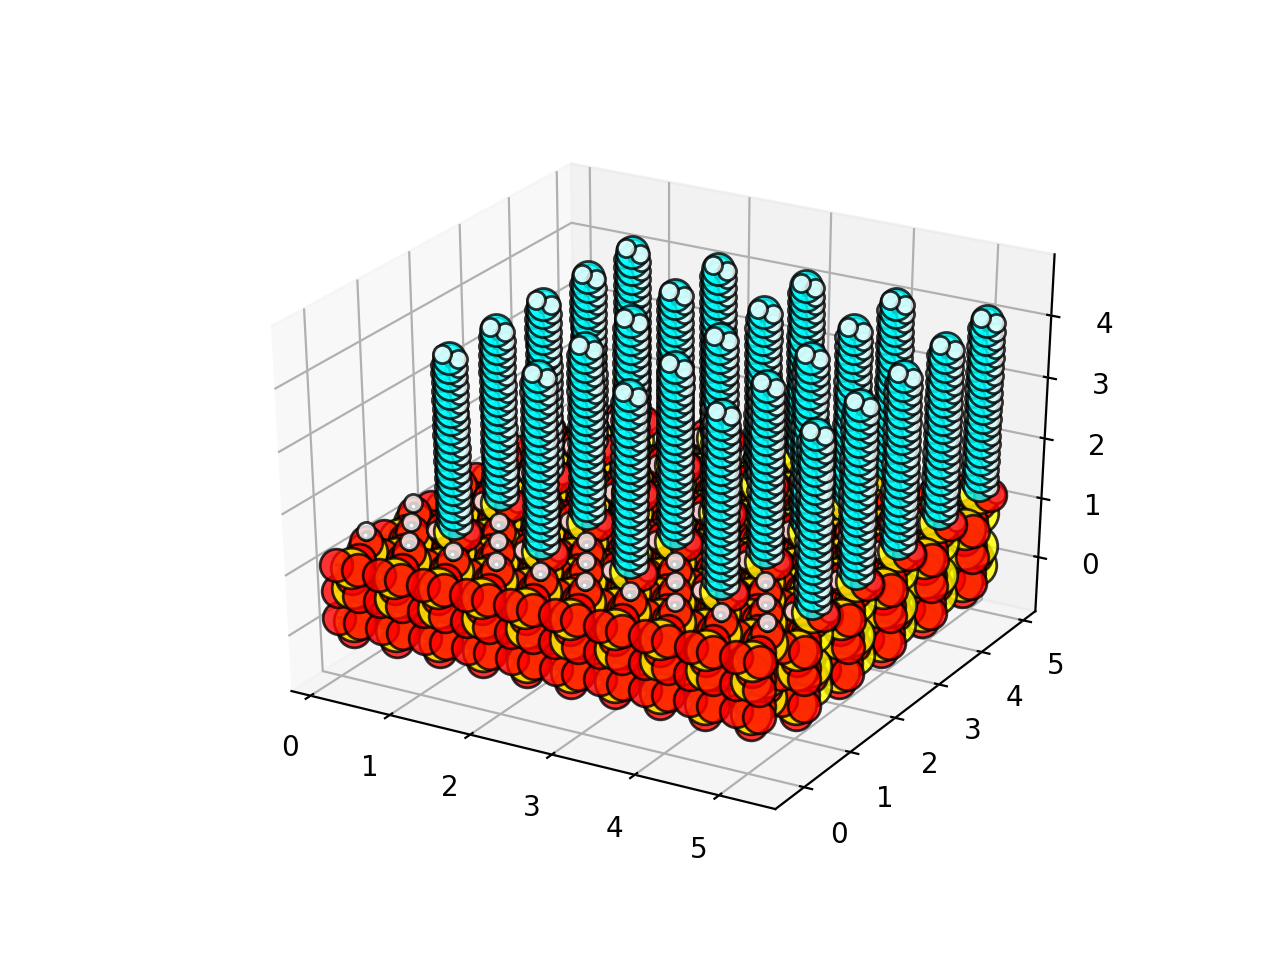

In [9]:
monolayer = AlkaneMonolayer(pattern=mb.Grid2DPattern(n=5, m=5), tile_x=1, tile_y=1, chain_length=20)
visualize(monolayer)

/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2108: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/summeraz/anaconda/envs/py3/lib/python3.5/site-packages/pandas/io/parsers.py:2110: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/Users/summeraz/mbuild/mbuild/recipes/monolayer.py:80: UserWarning: 
 No fractions provided. Assuming a single chain type.
  warn("\n No fractions provided. Assuming a single chain type.")
/Users/summeraz/mbuild/mbuild/recipes/monolayer.py:83: UserWarning: 
 Adding 100 of chain <AlkylSilane 21 particles, non-periodic, 20 bonds, id: 4772280304>
  warn("\n Adding {} of chain {}".format(len(pattern), chains[-1]))


<IPython.core.display.Javascript object>


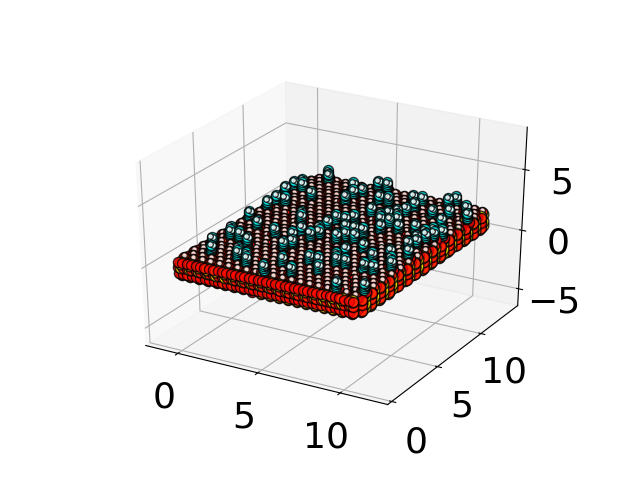

In [10]:
monolayer = AlkaneMonolayer(pattern=mb.Random2DPattern(n=100), tile_x=2, tile_y=3, chain_length=5)
visualize(monolayer)

### Tethered nanospheres

The `Tnp` class is a bit more abstract than our previous two classes, and defined a nanoparticle constructed of uniformly spaced beads featuring arbitrary polymer tethers. The `ball_radius` class can be used to tune the size of the nanoparticle. While the `n_chains` and `chain_length` arguments can be used to tune the number and length of the polymer tethers.

In [2]:
from mbuild.examples.tnp.tnp import Tnp

help(Tnp)

Help on class Tnp in module mbuild.examples.tnp.tnp:

class Tnp(mbuild.compound.Compound)
 |  A spherical nanoparticle with tethered chains.
 |  
 |  Method resolution order:
 |      Tnp
 |      mbuild.compound.Compound
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, ball_radius=10, n_chains=4, chain_length=10, monomer=None)
 |      Initialize a tethered nanoparticle.
 |      
 |      Args:
 |          ball_radius (float): Radius of the nanoparticle.
 |          n_chains (int): Number of chains to attach to the nanoparticle.
 |          chain_length (int): Length of the chains being attached.
 |          monomer (Compound, optional): Type of chain being attached.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from mbuild.compound.Compound:
 |  
 |  __getitem__(self, selection)
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  add(self, new_child, label=None, containment=True, replace=False, 

<IPython.core.display.Javascript object>


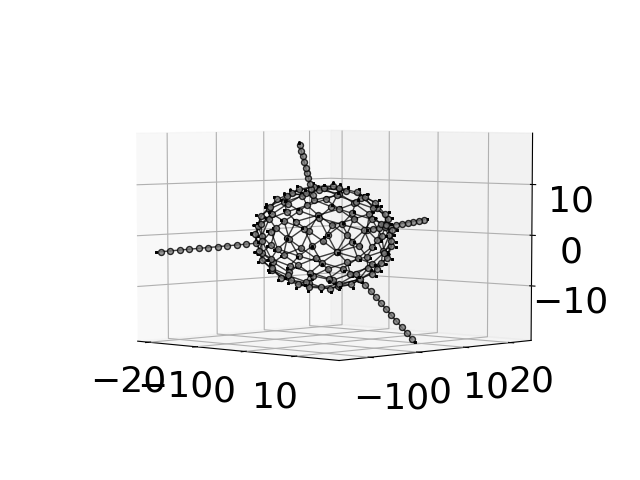

In [3]:
tnp = Tnp(ball_radius=10, n_chains=4, chain_length=10)
visualize(tnp)

<IPython.core.display.Javascript object>


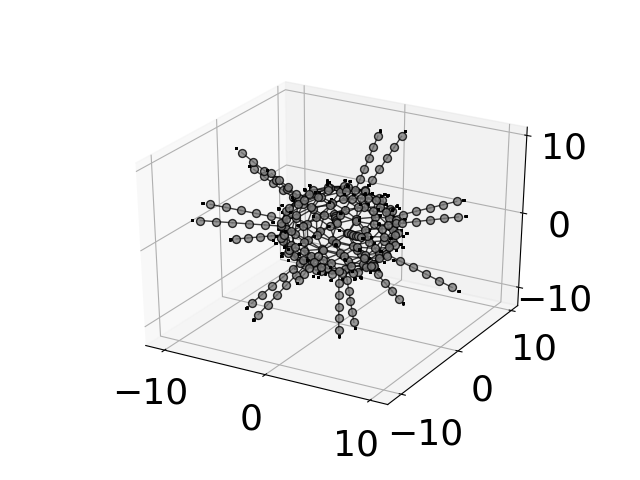

In [4]:
tnp = Tnp(ball_radius=5, n_chains=20, chain_length=5)
visualize(tnp)

## Recap

The goal of this tutorial was to demonstrate how mBuild classes can be used to easily tune the structure of complex molecular systems. In the following lessons, you will learn how to construct these classes so that you can begin using mBuild in your own research!